In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [5]:
# load standard breast cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
df = data.frame

In [6]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [8]:
X = df[['worst area','worst concave points']]
y = df['target']

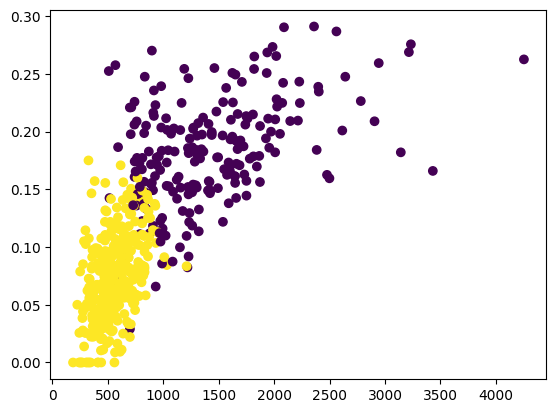

In [9]:
plt.scatter(X['worst area'],X['worst concave points'],c=y)
plt.show()

In [10]:
# train a decision tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X,y)

DecisionTreeClassifier()

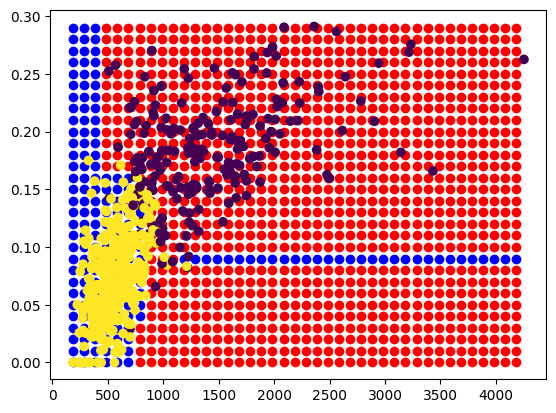

In [17]:
# plot the classifier predictions

for x1 in np.arange(X['worst area'].min(),X['worst area'].max(),100):
    for x2 in np.arange(X['worst concave points'].min(),X['worst concave points'].max(),0.01):
        pred = classifier.predict([[x1,x2]])[0]
        plt.scatter(x1,x2,c='red') if pred == 0 else plt.scatter(x1,x2,c='blue')
plt.scatter(X['worst area'],X['worst concave points'],c=y)

In [21]:
x1_min, x1_max = X['worst area'].min(), X['worst area'].max()
x2_min, x2_max = X['worst concave points'].min(), X['worst concave points'].max()

#create meshgrid
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 100),
                       np.arange(x2_min, x2_max, 0.01))

yy = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
yy = yy.reshape(xx1.shape)

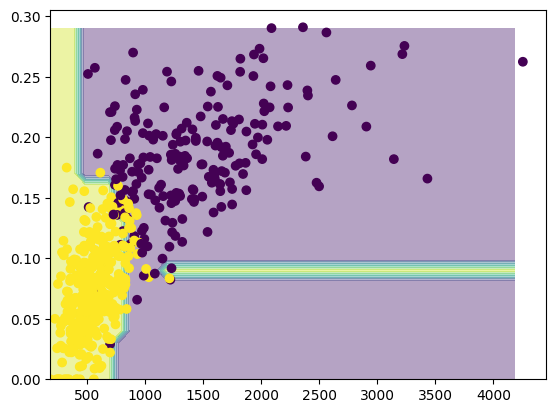

In [26]:
plt.contourf(xx1, xx2, yy, alpha=0.4)
plt.scatter(X['worst area'],X['worst concave points'],c=y)

In [39]:
X = df[['mean radius','mean texture']]
y = df['target']

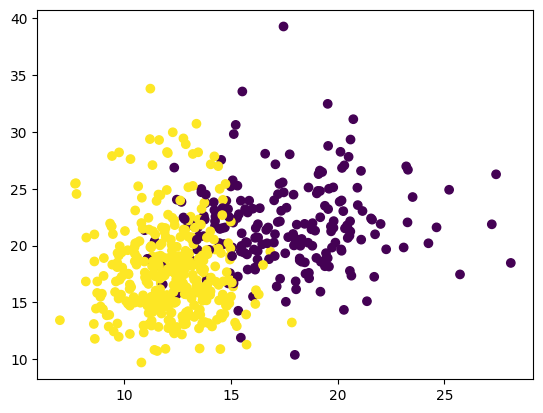

In [40]:
plt.scatter(X['mean radius'],X['mean texture'],c=y)

In [59]:
# create a function

def plotDecisionBoundary(X,y,classifier):
  x1_min, x1_max = X.iloc[:,0].min(), X.iloc[:,0].max()
  x2_min, x2_max = X.iloc[:,1].min(), X.iloc[:,1].max()

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, (x1_max-x1_min)/1000), np.arange(x2_min, x2_max, (x1_max-x1_min)/1000))

  yy = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
  yy = yy.reshape(xx1.shape)

  plt.contour(xx1, xx2, yy, alpha=0.4)
  plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y)

In [60]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

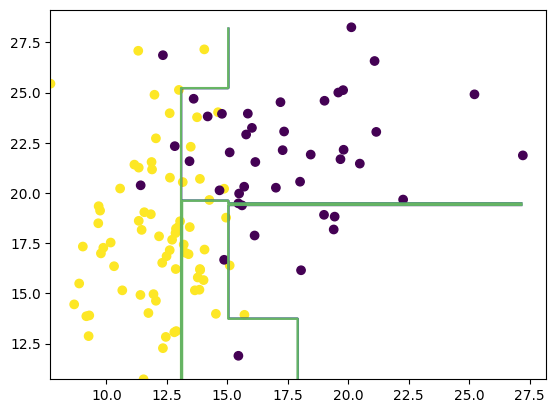

In [61]:
classifier = DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train,y_train)

plotDecisionBoundary(X_test,y_test,classifier)

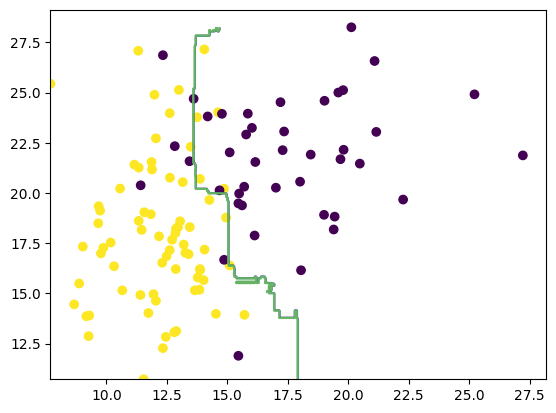

In [63]:
# now try a random forest

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=70,max_depth=3)
classifier.fit(X_train,y_train)

plotDecisionBoundary(X_test,y_test,classifier)

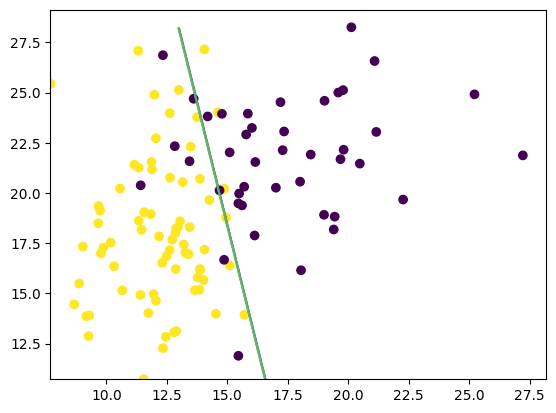

In [62]:
# now try a logistic regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train,y_train)

plotDecisionBoundary(X_test,y_test,classifier)

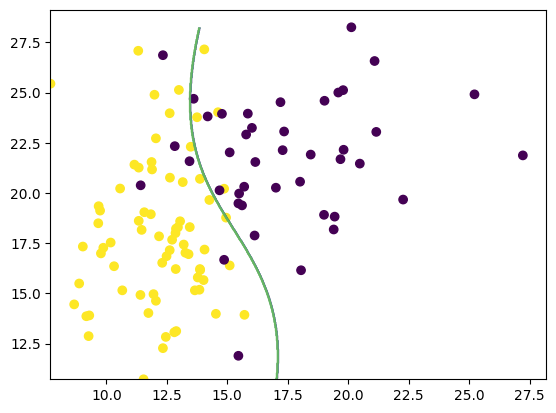

In [67]:
# try an svc

from sklearn.svm import SVC

classifier = SVC(kernel='poly',degree=4) #linear, rbf, poly
classifier.fit(X_train,y_train)

plotDecisionBoundary(X_test,y_test,classifier)